# Project: Performance Evaluation of Bandit Algorithms

- In this project, we will implement several classical bandit algorithms, evluate their performance via numerical comparison and finally gain inspiring intuition.

## Members of the team and contribution of each member

| Name | Student No.  | Contribution    |
|--------|----------|----------|
| 许杰瑞  | 2022533038               | UCB algorithm part, Markovian Bandit, Prompt engineering and Exploration-Exploitation Understanding                                |
| 胡崮斌  | 2022533186 |epsilon-greedy algorithm part for problem 1.2-1.5,gradient bandit algorithm for problem 1.6  and problem 2.4 and 2.5  |
| 刘宇飞   |        2022533037                      |            TS algorithm part for problem 1.2-1.5 and Bayesian bandit algorithms for problem 2.1, 2.2 and 2.3                          |

## Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system ($t=1,2,\ldots$) with three arms.
We denote the arm set as $\{1,2,3\}$.
Pulling each arm $j$ ($ j \in \{1,2,3\}$) will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, *i.e.*, Bern($\theta_{j}$).
Specifically,

\begin{equation*}
	\begin{aligned}
		r_{j} =
		\begin{cases}
			1, & w.p.\ \theta_{j}, \\
			0, & w.p.\ 1-\theta_{j},
		\end{cases}
	\end{aligned}
\end{equation*}
where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
  
Now we run this bandit system for $N$ ($N \gg 3$) time slots.
In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in \{1,2,3\}$.
Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$.
Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, *i.e.*,

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t = 1,\dots,N} \ \  \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)} \right].
	\end{aligned}
\end{equation*}

If we know the values of $\theta_{j},j \in \{1,2,3\}$, this problem is trivial.
Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

\begin{equation*}
	\begin{aligned}
		\mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right]
		= \sum_{t=1}^{N} \mathbb{E}[r_{I(t)}]
		= \sum_{t=1}^N \theta_{I(t)}.
	\end{aligned}
\end{equation*}

Let $I(t) = I^{*} = \mathop{\arg \max}\limits_{ j \in \{1,2,3\}} \ \theta_j$ for $t=1,2,\ldots,N$, then

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t=1,\ldots,N} \ \  \mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] = N \cdot \theta_{I^*}.
	\end{aligned}
\end{equation*}

However, in reality, we do not know the values of $\theta_{j},j \in \{1,2,3\}$.
We need to estimate the values $\theta_{j}, j \in \{1,2,3\}$ via empirical samples, and then make the decisions in each time slot.
Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

### (1). $\epsilon$-greedy Algorithm ($0 \leq \epsilon \leq 1$)

![](./e-greedy.jpg)

### (2). UCB (Upper Confidence Bound) Algorithm
![](./UCB.jpg)

### (3). TS (Thompson Sampling) Algorithm
![](./TS.jpg)

### Problem 1.1


#### Problem Description
1. Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

#### Solution
To get the maximized reward, we need always choose bandit 1. Then we have, $$\max_{I(t), t = 1, \cdots, N}{E\left[\sum_{t = 1}^{N}r_{I(t)}\right]} = N\cdot0.7 = 3500$$

### Problem 1.2

#### Problem State
2. Implement aforemented three classical bandit algorithms with following settings:
   
	- $N=5000$
	- $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
	- UCB with $c \in \{1,5,10\}$.
	- TS with
    	- $(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)$
    	- $(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)$

#### Solution

### (1) The implementation of $ϵ-greedy$ Algorithm

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Project Set-Up
real_theta=np.array([0.7,0.5,0.4])
N = 5000

In [40]:
#epsilon-greedy algorithm with three arms
def epsilon_greedy(n, epsilon):
    # Initialize the parameters
    total_reward=0
    theta_hat = np.zeros(3) # posterior probability of each arm
    count = np.zeros(3)

    # Implement the epsilon-greedy algorithm
    for t in range(1, n+1):
        #exploitation
        if np.random.uniform() > epsilon:
            arm = np.argmax(theta_hat)
        #exploration
        else:
            #randomly choose an arm from 1,2,3
            arm = np.random.randint(3)
        count[arm] += 1
        # Update theta_hat
        reward=np.random.binomial(1, real_theta[arm])
        total_reward+=reward
        theta_hat[arm] += (1/count[arm]) * (reward - theta_hat[arm])

    return total_reward

In [9]:
# settings of epsilon and n
epsilons=[0.1,0.5,0.9]
#one trial output of epsilon-greedy algorithm
print("When epsilon=0.1, the total reward is", epsilon_greedy(N, epsilons[0]))
print("When epsilon=0.5, the total reward is", epsilon_greedy(N, epsilons[1]))
print("When epsilon=0.9, the total reward is", epsilon_greedy(N, epsilons[2]))

When epsilon=0.1, the total reward is 3432
When epsilon=0.5, the total reward is 3034
When epsilon=0.9, the total reward is 2819


### (2) The implementation of $UCB$ Algorithm

In [16]:
### Implementation of UCB Algorithm:
def UCB(c):
    theta_hat = np.array([0., 0., 0.])
    count = np.array([1, 1, 1])
    total_reward = 0
    for i in range(3):
        theta_hat[i] = np.random.binomial(1, real_theta[i])
    
    for t in range(4, N+1):
        I_t = np.argmax(theta_hat + c * np.sqrt(2*np.log(t) / count))
        count[I_t] += 1
        r_t = np.random.binomial(1, real_theta[I_t])
        theta_hat[I_t] += 1/count[I_t] * (r_t - theta_hat[I_t])
        total_reward += r_t
    return total_reward, theta_hat

In [17]:
c_s = [1, 5, 10]
print("When c=1, the total reward is", UCB(c_s[0])[0])
print("When c=5, the total reward is", UCB(c_s[1])[0])
print("When c=10, the total reward is", UCB(c_s[2])[0])

When c=1, the total reward is 3486
When c=5, the total reward is 2988
When c=10, the total reward is 2842


### (3) The implementation of $TS$ Algorithm

In [19]:
### Implementation of TS Algorithm
def TS(a, b, n=5000):
    beta = np.array([(a[0], b[0]), (a[1], b[1]), (a[2], b[2])])
    total_r = 0
    theta_hat = np.zeros(3) 
    for _ in range(0, n):
        for j in range(3):
            theta_hat[j] = np.random.beta(beta[j][0], beta[j][1])
        arm = np.argmax(theta_hat)
        r = np.random.binomial(1, real_theta[arm]) # reward
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r
    return total_r 


In [20]:

print(f"When alpha_i and beta_i are 1 for each i = 1, 2, 3, the reward is {TS([1, 1, 1], [1, 1, 1])}")

print(f"When alpha_i = 601, 401, 2 and beta_i = 401, 601, 3 for   i = 1, 2, 3, the reward is {TS([601, 401, 2], [401, 601, 3])}")

When alpha_i and beta_i are 1 for each i = 1, 2, 3, the reward is 3491
When alpha_i = 601, 401, 2 and beta_i = 401, 601, 3 for   i = 1, 2, 3, the reward is 3486


### Problem 1.3

#### Problem Description
3. Each experiment $N=5000$ time slots, and we run each experiment 200 trials. Results are averaged over these independent trials.

#### Solution

In [10]:
num_trials = 200

In [11]:
## epsilon-greedy
#200 trails of epsilon-greedy algorithm, get the average total reward
total_reward=np.zeros((num_trials,3))
theta_hat=np.zeros((num_trials,3))
for i in range(num_trials):
    total_reward[i,0]=epsilon_greedy(N, epsilons[0])
    total_reward[i,1]=epsilon_greedy(N, epsilons[1])
    total_reward[i,2]=epsilon_greedy(N, epsilons[2])

average_total_reward_1=np.mean(total_reward[:,0])
average_total_reward_2=np.mean(total_reward[:,1])
average_total_reward_3=np.mean(total_reward[:,2])


print(f"The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.1 is {average_total_reward_1} regret is {3500 - average_total_reward_1}")
print(f"The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.5 is {average_total_reward_2} regret is {3500 - average_total_reward_2}")
print(f"The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.9 is {average_total_reward_3} regret is {3500 - average_total_reward_3}")

The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.1 is 3416.165 regret is 83.83500000000004
The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.5 is 3080.4 regret is 419.5999999999999
The average total reward of 200 trails of epsilon-greedy algorithm when epsilon=0.9 is 2752.14 regret is 747.8600000000001


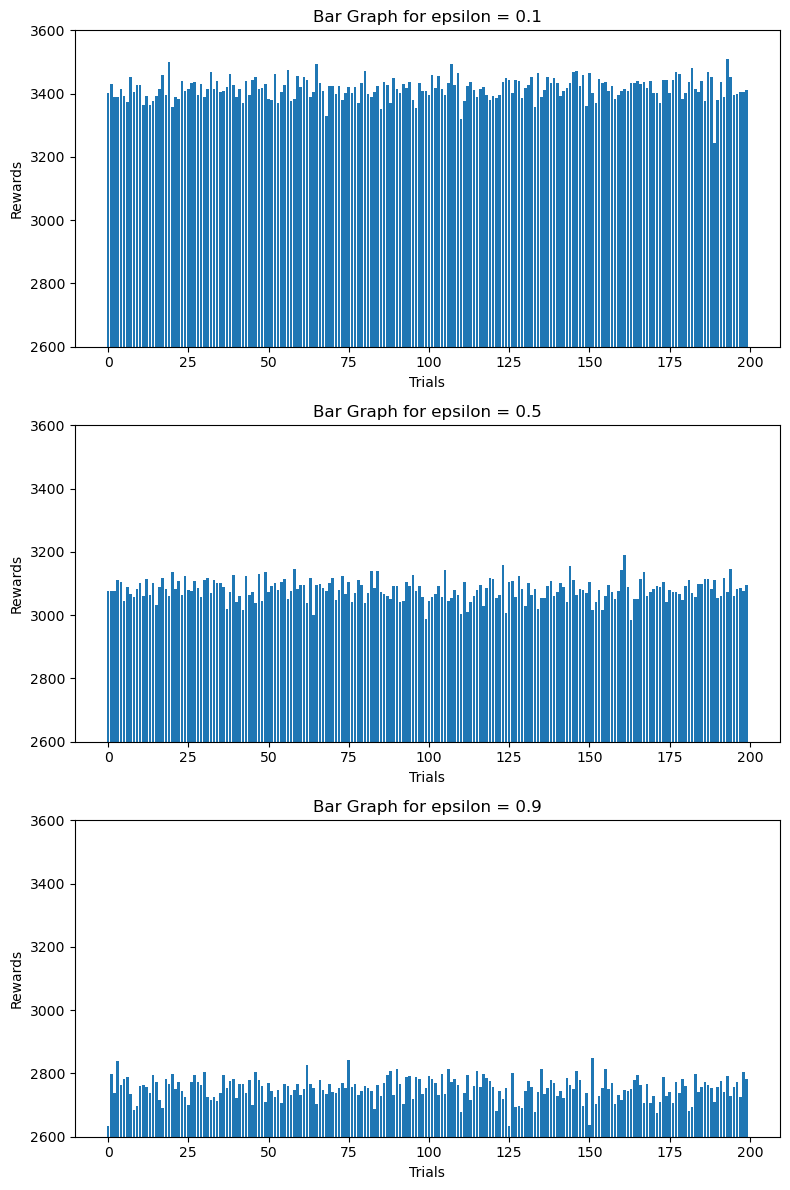

In [14]:
#plot the total rewards for each epsilon
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i in range(3):
    column_data = total_reward[:, i]
    axs[i].bar(range(len(column_data)), column_data)
    axs[i].set_xlabel('Trials')
    axs[i].set_ylabel(f'Rewards')
    axs[i].set_title(f'Bar Graph for epsilon = {epsilons[i]}')
    axs[i].set_ylim(2600, 3600)

plt.tight_layout()
plt.show()

In [21]:
## UCB

total_reward = np.zeros((3, num_trials))
ucb_para = np.array([1, 5, 10])
para_i = 0
for para in ucb_para:
    rewards = 0
    thetas = np.array([0., 0., 0.])
    for i in range(num_trials):
        r, t = UCB(para)
        total_reward[para_i, i] = r;
        rewards += r
        thetas += t
    rewards /= num_trials
    thetas /= num_trials
    para_i += 1
    print(f"When c = {para}, the average reward is {rewards}, the regret is {3500-rewards}")


When c = 1, the average reward is 3410.37, the regret is 89.63000000000011
When c = 5, the average reward is 2979.97, the regret is 520.0300000000002
When c = 10, the average reward is 2825.475, the regret is 674.5250000000001


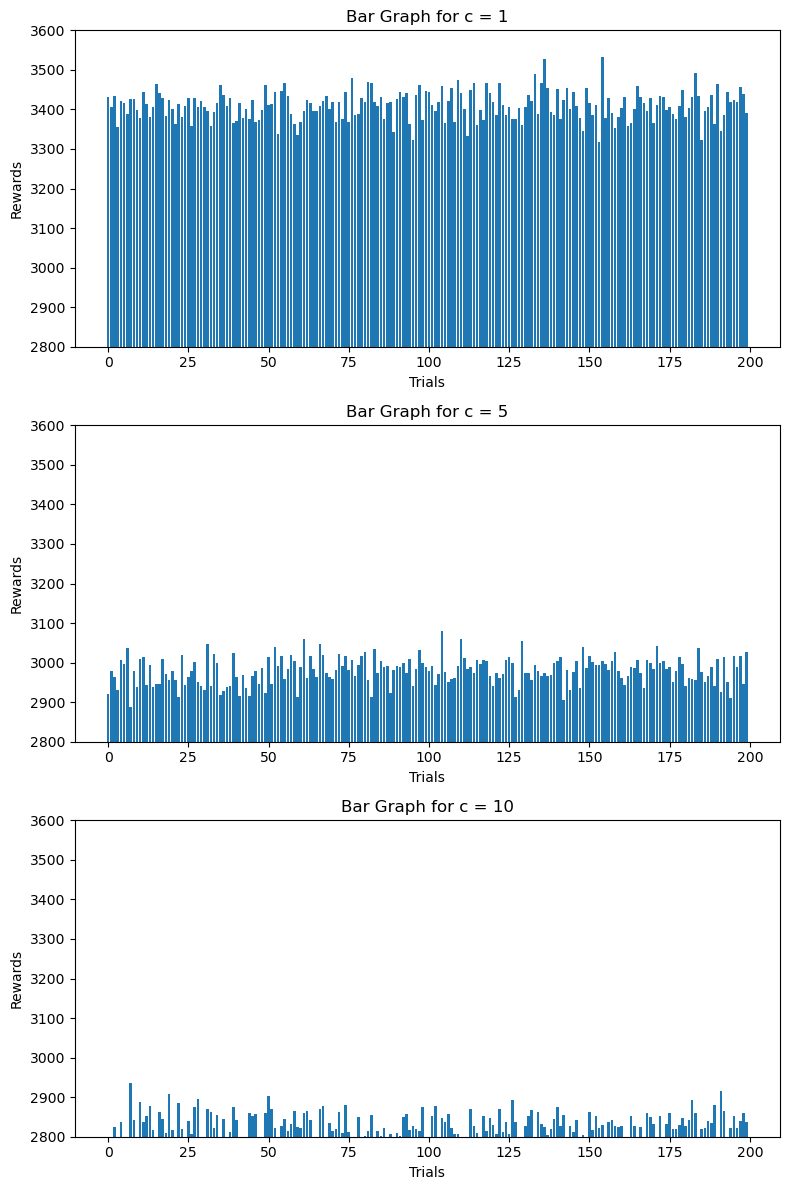

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
for i in range(3):
    column_data = total_reward[i, :]
    axs[i].bar(range(len(column_data)), column_data)
    axs[i].set_xlabel('Trials')
    axs[i].set_ylabel(f'Rewards')
    axs[i].set_title(f'Bar Graph for c = {c_s[i]}')
    axs[i].set_ylim(2800, 3600)

plt.tight_layout()
plt.show()
    

In [25]:
## Thompson
total_reward = np.zeros((2, num_trials))
ts_para = [[[1, 1, 1], [1, 1, 1]], [[601, 201, 2], [401, 601, 3]]]
para_i = 0

for p in ts_para:
    rewards = 0
    for i in range(num_trials):
        r = TS(p[0], p[1]) 
        total_reward[para_i, i] = r;
        rewards += r
    rewards /= num_trials
    para_i += 1
    print(f"Thompson Simulation{para_i}, the average reward is {rewards}, the regret is {3500-rewards}")
  

Thompson Simulation1, the average reward is 3477.375, the regret is 22.625
Thompson Simulation2, the average reward is 3494.43, the regret is 5.570000000000164


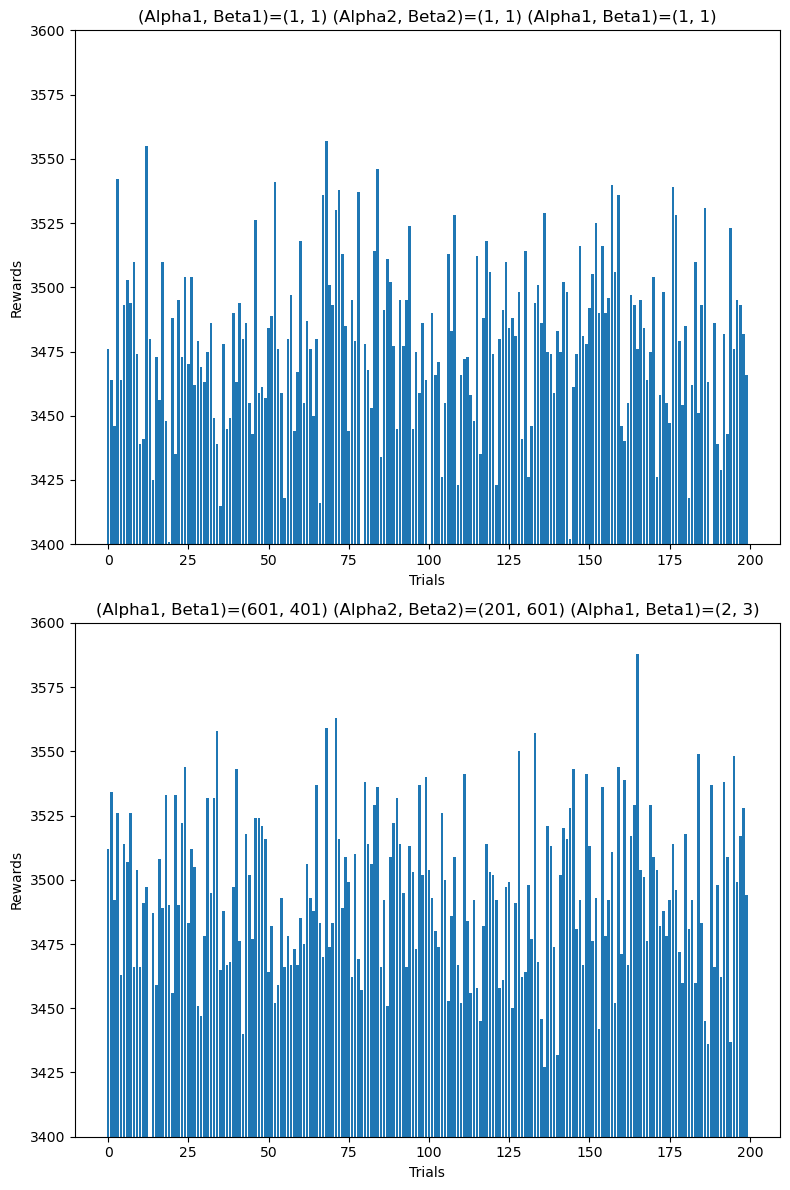

In [28]:

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
for i in range(2):
    column_data = total_reward[i, :]
    axs[i].bar(range(len(column_data)), column_data)
    axs[i].set_xlabel('Trials')
    axs[i].set_ylabel(f'Rewards')
    axs[i].set_title(f'(Alpha1, Beta1)={ts_para[i][0][0], ts_para[i][1][0]} (Alpha2, Beta2)={ts_para[i][0][1], ts_para[i][1][1]} (Alpha1, Beta1)={ts_para[i][0][2], ts_para[i][1][2]}')
    axs[i].set_ylim(3400, 3600)

plt.tight_layout()
plt.show()
    

### Problem 1.4

#### Problem Description
4. Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS.
   - Compute the gaps between the algorithm outputs and the oracle value.
   - Which one is the best?
   - Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively.

#### Solution

The gaps are quite easy to obtain:

|Settings      | Reward Gap      | 
|----------------|:---------------:|
|$\epsilon=0.1$|   83.835         |      |   |   |
|$\epsilon=0.5$|   419.599       |     |   |    |
|$\epsilon=0.9$|   747.860        |      |   |   |
|   $c = 1$      |     89.6300       | -0.00010373|  0.0083617|  0.010950|
|   $c = 5$      |    520.030    | 0.00024275| 0.00018228|  0.00087041|
|   $c = 10$     |    674.525    |  0.00037165| 0.00035640 |  0.00048897 |
|$(\alpha_{i},(\beta_{i})=[(1,1),(1,1),(1,1)]$|  22.625      |     |  |   |
|$(\alpha_{i},(\beta_{i})=[(601,401),(401,601),(2,3)]$| 5.570 |      |     |    |

- **Which one is the best?**

The Thompson Sampling Algorithm is the best.

- **Effects of parameters**:

$\epsilon$: $\epsilon$ represents the proportion of exploration days to the total number of days. The larger the $\epsilon$ is, the more likely the algorithm will explore. The smaller the $\epsilon$ is, the more likely the algorithm will exploit. From the graph below we can see as $\epsilon$ increases, the reward decreases, which is weird. Because when $\epsilon=0$, we perfom exploit-only strategy, which cannot be the best strategy intuitively. Why?

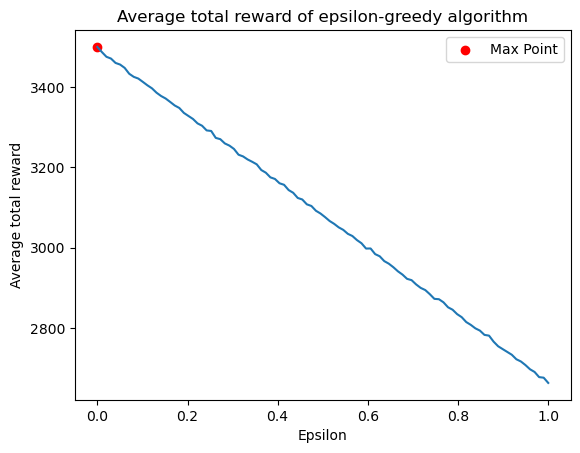

The maximum point is at coordinate: (0.0, 3500.215)


In [166]:
epsilons = np.linspace(0, 1, 100)
total_rs = np.zeros(100)
for k in range(100):
    total_r = 0
    for i in range(200):
        total_r += epsilon_greedy(N, epsilons[k])
    total_rs[k] = total_r/200

max_index = np.argmax(total_rs)  # Find the index of the maximum value
max_value = total_rs[max_index]  # Get the maximum value
max_coord = (epsilons[max_index], max_value)  # Coordinate of the maximum point

plt.plot(epsilons, total_rs)
plt.scatter(max_coord[0], max_coord[1], color='red', label='Max Point')
plt.xlabel('Epsilon')
plt.ylabel('Average total reward')
plt.title('Average total reward of epsilon-greedy algorithm')
plt.legend()
plt.show()

print(f"The maximum point is at coordinate: {max_coord}")


This is because `np.argmax(arr)` function, if the elements in `arr` are equal, it always return index `0`. In this context when $\epsilon=0$, we always explore, namely the code in `epsilon_greedy` always execute the line `arm = np.argmax(theta_hat)`. In the first time of the execution, `theta_hat = [0, 0, 0]` and we choose arm 1, `theta_hat[0] >= 0` after updating. In the rest execution, we always choose arm 1 which happens to be the bandit with highest probability 0.7. We fix it, we write function `my_argmax(arr)` to ranromly return the index if there is a tie.

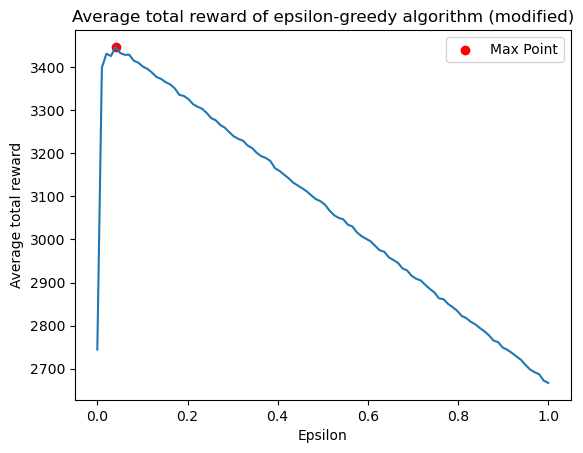

The maximum point is at coordinate: (0.04040404040404041, 3446.88)


In [167]:
def my_argmax(arr):
    if arr[0] == arr[1] == arr[2]:
        return np.random.randint(3)
    elif arr[0] == arr[1] and arr[0] > arr[2]:
        return (0 if np.random.binomial(1, 0.5) else 1)
    elif arr[1] == arr[2] and arr[1] > arr[0]:
        return (1 if np.random.binomial(1, 0.5) else 2)
    elif arr[0] == arr[2] and arr[0] > arr[1]:
        return (0 if np.random.binomial(1, 0.5) else 2)
    else:
        return np.argmax(arr)

def better_epsilon_greedy(n, epsilon):
    # Initialize the parameters
    total_reward=0
    theta_hat = np.zeros(3) # posterior probability of each arm
    count = np.zeros(3)

    # Implement the epsilon-greedy algorithm
    for t in range(1, n+1):
        #exploitation
        if np.random.uniform() > epsilon:
            arm = my_argmax(theta_hat)
        #exploration
        else:
            #randomly choose an arm from 1,2,3
            arm = np.random.randint(3)
        count[arm] += 1
        # Update theta_hat
        reward=np.random.binomial(1, real_theta[arm])
        total_reward+=reward
        theta_hat[arm] += (1/count[arm]) * (reward - theta_hat[arm])

    return total_reward

epsilons = np.linspace(0, 1, 100)
total_rs = np.zeros(100)
for k in range(100):
    total_r = 0
    for i in range(200):
        total_r += better_epsilon_greedy(N, epsilons[k])
    total_rs[k] = total_r/200

max_index = np.argmax(total_rs)  # Find the index of the maximum value
max_value = total_rs[max_index]  # Get the maximum value
max_coord = (epsilons[max_index], max_value)  # Coordinate of the maximum point

plt.plot(epsilons, total_rs)
plt.scatter(max_coord[0], max_coord[1], color='red', label='Max Point')
plt.xlabel('Epsilon')
plt.ylabel('Average total reward')
plt.title('Average total reward of epsilon-greedy algorithm (modified)')
plt.legend()
plt.show()

print(f"The maximum point is at coordinate: {max_coord}")



When $\epsilon = 0.04$, we have the highest reward.

$c$: According to the formula 
$$I(t) = \arg \max_{j \in \{1, 2, 3\}} \left(\hat{\theta}(j) + c\cdot\sqrt{\frac{2\log t}{count(j)}}\right)$$ 


If $j_1 \neq j_2 \in \{1, 2, 3\}$, and $\hat{\theta}(j_1)$ and $\hat{\theta}(j_2)$ are close, then the formula above favors the bandit that has not been used too much compared to the one that has been used many times because $\text{count}(j_1) < \text{count}(j_2)$, making the second term in the formula larger. In other words, the second part of the formula relates to exploration, and parameter $c$ is the weight on exploration. As $c$ increases, the UCB algorithm tends to explore more.

Under the current settings where we obtain the Bernoulli distribution parameters from the oracle, the table above illustrates that the larger $c$ is, the smaller the reward. This is due to significant differences in the distribution parameters for $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$. After exploring a few times, we can easily determine which bandit produces more reward, rendering further exploration unnecessary. Excessive exploration only diminishes our overall reward. As shown in the graph below, when choossing $c$ properly, we can get the highest reward.  

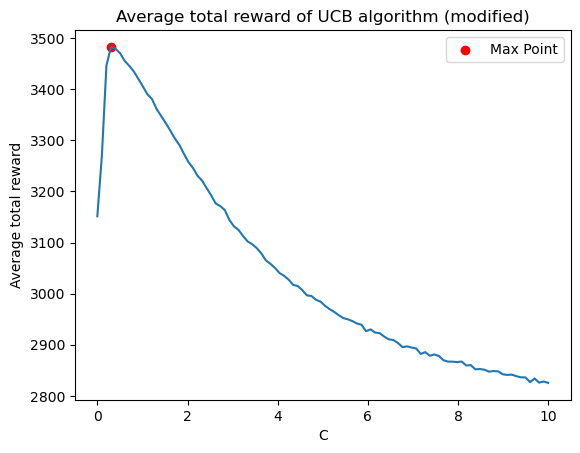

The maximum point is at coordinate: (0.30303030303030304, 3482.935)


In [168]:
c_s = np.linspace(0, 10, 100)
total_rs = np.zeros(100)
for k in range(100):
    total_r = 0
    for i in range(200):
        total_r += UCB(c_s[k])[0] 
    total_rs[k] = total_r/200

max_index = np.argmax(total_rs)  # Find the index of the maximum value
max_value = total_rs[max_index]  # Get the maximum value
max_coord = (c_s[max_index], max_value)  # Coordinate of the maximum point

plt.plot(c_s, total_rs)
plt.scatter(max_coord[0], max_coord[1], color='red', label='Max Point')
plt.xlabel('C')
plt.ylabel('Average total reward')
plt.title('Average total reward of UCB algorithm (modified)')
plt.legend()
plt.show()

print(f"The maximum point is at coordinate: {max_coord}")



When $c = 0.30$, we have the highest reward.

$\alpha, \beta$:
The variables $\alpha_i$ and $\beta_i$ represent the prior probabilities of the distribution. In general, the algorithm's performance improves when $\alpha_i$ and $\beta_i$ closely approximate the real probabilities. However, it has been observed that if both $\alpha_i$ and $\beta_i$ are very small, the distribution tends to be relatively uniform. Conversely, when both $\alpha_i$ and $\beta_i$ are very large, the distribution becomes highly concentrated. This suggests that when $\alpha_i$ and $\beta_i$ are initially large, there is a tendency to always choose $\arg \mathop{\max}\limits_{i\in\{1,2,3\}} \frac{\alpha_i}{\alpha_i+\beta_i}$. This may result in poor performance if a bandit with a high true probability of success has a low prior probability of success.  Simultaneously, when both $\alpha_i$ and $\beta_i$ are initially small, the ratio $\frac{\alpha_i}{\alpha_i+\beta_i}$ for the bandit with the highest true probability of success converges to the true probability of success very rapidly. Then, when all three bandits have a large $\alpha_i+\beta_i$, we almost always choose $\arg \mathop{\max}\limits_{i\in\{1,2,3\}} \frac{\alpha_i}{\alpha_i+\beta_i}$.

| $(\alpha,\beta)=(1,1)$ | $(\alpha,\beta)=(2,3)$ |
|---|---|
| ![1](./1.png) | ![2](./2.png) |
| $(\alpha,\beta)=(601,401)$ | $(\alpha,\beta)=(401,601)$ |
| ![3](./3.png) | ![4](./4.png) |


### Problem 1.5

#### Problem State
5. Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

Exploration means we need to find more information about each bandit while exploitation means that use the information we currenly have to make local optimal decision. The challenge arises from the fact that the decision-maker must decide whether to exploit the arm with the highest observed reward so far or to explore other arms in the hope of finding a better one.

- $\epsilon$-Greedy: In the $\epsilon$-greedy strategy, the exploration-exploitation trade-off is employed, as evident in its theoretical framework. This approach entails selecting the arm with the highest known probability (exploitation), or alternatively, randomly choosing an arm (exploration) with a probability determined by the parameter $\epsilon$. The parameter $\epsilon$ governs the balance between these two objectives. A lower value of $\epsilon$ corresponds to a greater inclination towards exploration, while a higher value promotes exploitation. 

- UCB Algorithm: The UCB algorithm assigns a score to each arm, and the arm with the highest score is chosen for the next trial. The score typically consists of two components: the estimated mean reward and a term proportional to the uncertainty. The uncertainty term encourages exploration by giving higher scores to arms with higher uncertainty. As more trials are conducted, the algorithm updates its estimates of the mean rewards and adjusts the balance between exploration and exploitation. Over time, the algorithm tends to converge to the arm with the highest true mean reward while still exploring other arms to ensure that no better option is overlooked.

- Thompson Sampling Algorithm: When all three bandits have small $\alpha_i$ and $\beta_i$, the distributions are relatively uniform, leading us to choose a bandit relatively randomly. This phase represents exploration, where the algorithm tries out different bandits to learn about their reward distributions, allowing it to gather information and refine its estimates of the true rewards associated with each bandit. After numerous trials, when $\alpha_i$ and $\beta_i$ become large, the distributions become highly concentrated. Consequently, we tend to choose the bandit with the highest probability of success almost every time. This phase characterizes exploitation, which involves choosing the bandit believed to be the best based on the available information. However, this approach also risks missing out on potentially better options that have not been thoroughly explored. 

The following graphs visualize the updating process of $\alpha$ and $\beta$, We can see that as the game progresses, the beta distribution tends to have low variance, resulting in a slender and peaked curve. Simultaneously, the expectation (mean) and the mode (peak) of the beta distribution converge to $0.7$, which represents the true probability of success for that particular arm.



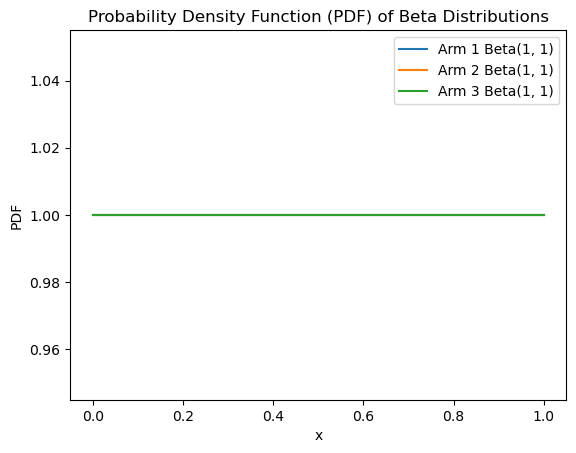

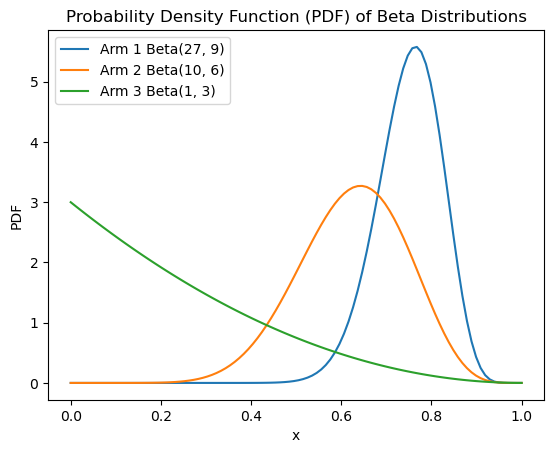

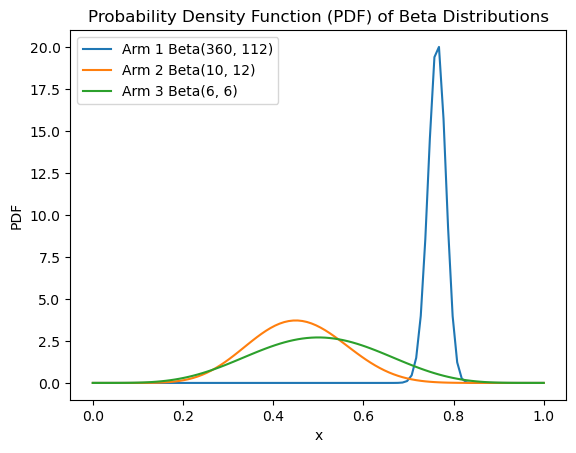

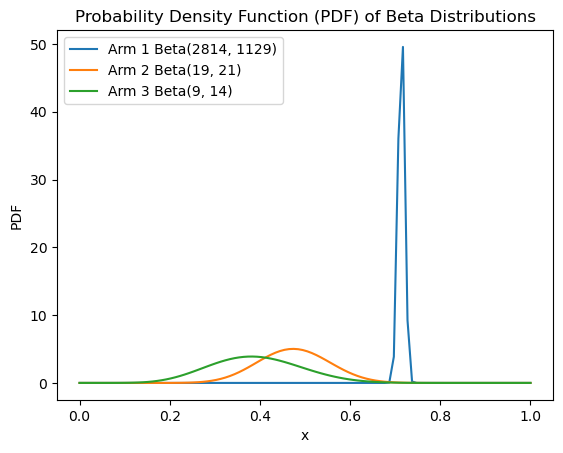

3531

In [194]:
from scipy.stats import beta
real_theta=np.array([0.7,0.5,0.4])

def plot_beta(params):
    x = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    arm = 1
    for a, b in params:
        y = beta.pdf(x, a, b)
        ax.plot(x, y, label=f'Arm {arm} Beta({a}, {b})')
        arm += 1

    ax.set_xlabel('x')
    ax.set_ylabel('PDF')

    ax.set_title('Probability Density Function (PDF) of Beta Distributions')
    ax.legend()

    plt.show()

def TS_graph(a, b, n=5000):
    beta = np.array([(a[0], b[0]), (a[1], b[1]), (a[2], b[2])])
    total_r = 0
    theta_hat = np.zeros(3) 
    n_set = {0, 50, 500, 4000}
    for i in range(0, n):
        if i in n_set:
            plot_beta(beta)
        for j in range(3):
            theta_hat[j] = np.random.beta(beta[j][0], beta[j][1])
        arm = np.argmax(theta_hat)
        r = np.random.binomial(1, real_theta[arm]) # reward
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r
    return total_r 

TS_graph([1, 1, 1], [1, 1, 1])

In this trade-off, the Thompson Sampling Algorithm initially emphasizes exploration and gradually shifts towards exploitation as the uncertainty in the estimated probabilities decreases. This approach ensures that the correct arm is selected most of the time, eliminating unnecessary exploration and instead gathering data from the actual distributions, which leads to more accurate estimations. This ability to balance exploration and exploitation effectively is one of the reasons why this approach is considered advantageous.


In order to reach a balance between eploration and exploitation, there are two things to take into account, the total time slots $N$ and the distributions of rewards of bandits. When the number of time slots is relatively limited, it is advisable to reduce exploration and prioritize exploitation. Conversely, when the reward distributions of individual bandits exhibit significant similarity, a more extensive exploration strategy becomes essential. This heightened exploration aims to gather substantial information, aiding in the discernment of the optimal bandit among the available options.


**Explore-Exploit Example**

To gain a better understanding of exploration and exploitation trade-off, let's consider the following example.

You are going to a town to live for 300 days. There are $n(n < 300)$ restaurants in a town, there is a distribution of how much *happiness* you are going to derive when you visit a restaurant. The distributions are assumed to be normal. You'll visit a restaurant each day. Your goal is to maximize your happiness during the 300 days. You have the following strategies, 

1. Explore-only strategy. You randomly go to a restaurant each day, only exploring for the 300 days.
2. Exploit-only strategy. You visit $n$ restaurants during the first $n$ days and whichever gave you the best meal during the $n$ days, you pick that restaurant for the rest $300-n$ days.
3. UCB1 strategy. 

Let's paramertize the distribution of each restaurant.

For restaurants $\{r_1, r_2, \cdots, r_n\}$, their mean values are $3, 6, \cdots, 3n$ respectively.

Deviation ration $d$ for $Z\sim Norm(\mu, \sigma^2)$, $$d = \frac{\sigma}{\mu}$$ The bigger the $d$ is, the distribution is more spread out. Consider the following examples where $Z_1\sim Norm(1, \left(1\times0.8\right)^2)$ and $Z_2\sim Norm(2, (2\times0.1)^2)$. The values for $d$ are 0.8 and 0.1 respectively. From the graph below we can see $Z_1$ is more spread out.

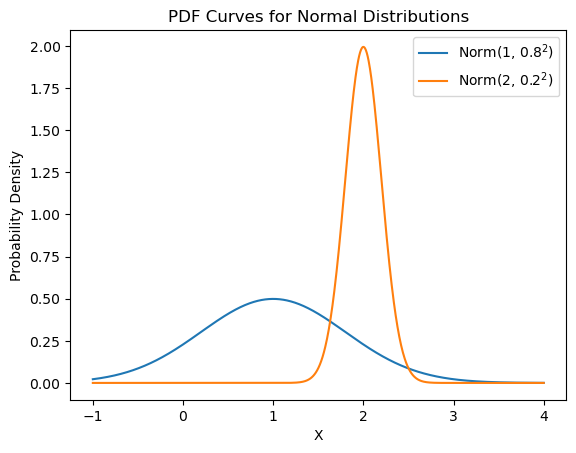

In [170]:
mu1, sigma1 = 1, 0.8
mu2, sigma2 = 2, 0.2

x = np.linspace(-1, 4, 1000)

pdf1 = scipy.stats.norm.pdf(x, mu1, sigma1)
pdf2 = scipy.stats.norm.pdf(x, mu2, sigma2)

plt.plot(x, pdf1, label='Norm(1, 0.8$^2$)')
plt.plot(x, pdf2, label='Norm(2, 0.2$^2$)')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('PDF Curves for Normal Distributions')

plt.legend()

plt.show()


Define the mean regret $\overline{R}$ of a strategy to be, $$\overline{R} = \frac{\text{optinal reward} - \text{average reward of the strategy}}{\text{optimal reward}}$$

The $\overline{R}$ for a strategy should be as small as possible.

In [171]:
from example import ucb1
from example import Restaurant
from example import exploit_only
from example import explore_only

def stimulation(num_res, dev_factor, num_days, num_simus = 1000):
    mu_vals = [3*i for i in range(1,num_res+1)]
    dev_vals = [mu*dev_factor for mu in mu_vals]
    mu_dev_pairs = zip(mu_vals, dev_vals)

    candidates = [Restaurant(mu,dev) for mu,dev in mu_dev_pairs]
    optimal_average = max(mu_vals)*num_days

    explore_only_vals = []
    exploit_only_vals = []
    ucb1_vals = []

    for _ in range(num_simus):
        exploit_only_vals.append(exploit_only(candidates, num_days))
        explore_only_vals.append(explore_only(candidates, num_days))
        ucb1_vals.append(ucb1(candidates, num_days))
    
    return [1 - np.mean(explore_only_vals)/optimal_average, 1 - np.mean(exploit_only_vals)/optimal_average, 1 - np.mean(ucb1_vals)/optimal_average]

num_res = [3, 10, 100]
dev_factors = [0.1, 0.5]
num_days =300

record = {}

for i in num_res:
    for j in dev_factors:
        record[(i, j)] = stimulation(i, j, num_days)

print(record)

{(3, 0.1): [0.3333652501968538, 0.004009298120512317, 0.010673928812473865], (3, 0.5): [0.33240392788328277, 0.11227259399435752, 0.05324650168479739], (10, 0.1): [0.4492754080212662, 0.041956982696936374, 0.036397044466927486], (10, 0.5): [0.45110780984695864, 0.13871671590723866, 0.09500456688739956], (100, 0.1): [0.4952441435609024, 0.1890345729808215, 0.3437301542082771], (100, 0.5): [0.4938886524216073, 0.22610965506049918, 0.38134738215074826]}


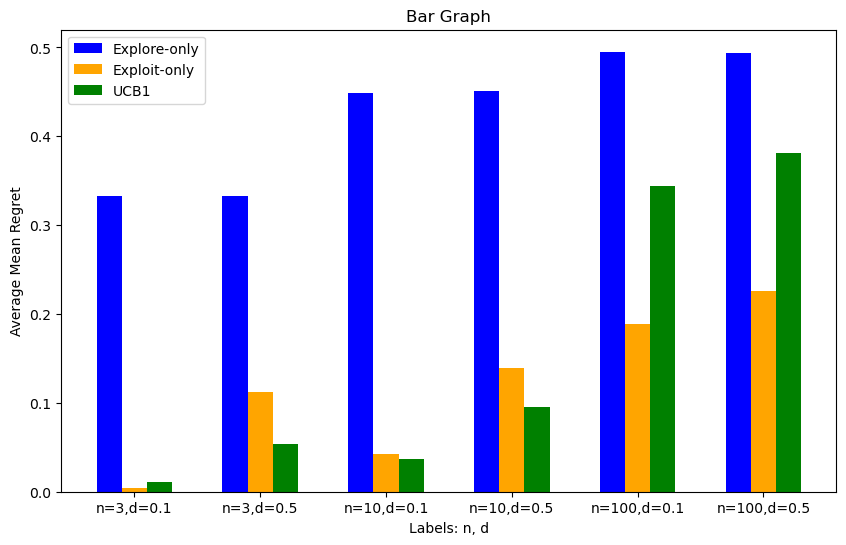

In [172]:
# visualize the outcome for different strategies
D = {}
for i in record:
    key = f"n={i[0]},d={i[1]}"
    D[key] = record[i]

# Extract labels and values from the dictionary
labels = list(D.keys())
values = list(D.values())

# Extract the three sets of values for each label
set1 = [val[0] for val in values]
set2 = [val[1] for val in values]
set3 = [val[2] for val in values]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

plt.figure(figsize=(10, 6))
# Create the bar plot
plt.bar(r1, set1, color='blue', width=bar_width, label='Explore-only')
plt.bar(r2, set2, color='orange', width=bar_width, label='Exploit-only')
plt.bar(r3, set3, color='green', width=bar_width, label='UCB1')

# Add labels and title
plt.xlabel('Labels: n, d')
plt.ylabel('Average Mean Regret')
plt.title('Bar Graph')

# Set the x-axis tick labels
plt.xticks([r + bar_width for r in r1], labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()

From the bar graph above, it is evident that the **Explore-only strategy** exhibits the highest average mean regret, indicating its status as the least effective strategy. Solely relying on exploration is not a viable approach. However, the **Exploit-only strategy** occasionally outperforms **UCB1**, and vice versa.

### First Two Cases

In the first two cases, where we have a total of three restaurants, the only difference lies in $d$. When $d = 0.1$, the **Exploit-only strategy** outperforms. This is attributed to the distributions being narrow. With such narrow distributions, a single meal from each restaurant provides sufficient information to make an informed decision, favoring strategies heavily weighted towards exploitation. Conversely, when $d = 0.5$, **UCB1** outperforms. The distribution becomes flat, signifying significant uncertainty about the quality of meals in each restaurant. **UCB1** excels in striking a better balance between exploration and exploitation.

### Next Two Cases

In the next two cases, where we now have a total of ten restaurants, **UCB1** outperforms the **Explore-only strategy** in both instances with $d = 0.1$ and $0.5$. This is attributed to the increased number of restaurants. Even with a relatively certain and narrow distribution, the sheer quantity of restaurants makes it less likely to pick the optimal one through a single exploration. Consequently, the **Exploit-only strategy** is more prone to failure.

### Final Two Cases

In the final two cases, the **Exploit-only strategy** again outperforms **UCB1**, which contradicts our analysis from the previous two cases. One factor not previously considered is the assumption that we only have $N = 300$ days in total and $N \gg n$. In this scenario, $n = 100$, and thus, the assumption $N \gg n$ no longer holds. Both **UCB1** and the **Exploit-only strategy** utilize the first 100 days to sample each restaurant once. However, the remaining 200 days are insufficient for **UCB1** to find an optimal balance between exploration and exploitation.

This example illustrates that the distributions of rewards, the number of bandits, and the total number of time slots all play crucial roles in influencing the exploration-exploitation tradeoff in bandit algorithms.



### Problem 1.6

#### Problem State
6. We implicitly assume the reward distribution of these three arms are independent. How about the dependent case?
	Can you design an algorithm to exploit such information to obtain a better result?

#### Case I: Multi-Armed Bandit Problem with Markovian Rewards
Settings: There are K arms indexed by $i = 1, 2, \cdots, K$. The $i$ th arm is modeled as an The $i$ th arm is modeled as an irreducible Markov chain with binary state space $S^i$, namely $S^i = \{0, 1\}$. Rewards drawn from a state of an arm is stationary and positive. Let $r_x^i$ denote the reward obtained from state x of arm $i$. We assume the arms (i.e., the Markov chains) are mutually independent. The mean reward from arm $i$, denoted by $µ^i$ , is the expected reward of arm $i$ under its stationary distribution $\bm{\pi^i} = (\pi_x^i, x\in S^i)$. Then, $$\mu^i = \sum_{x\in S^i}r_x^i\pi_x^i$$
Define $\mu^* = \max_{1\leq i \leq K}\mu^i$ as the highest mean among bandits.

Dependence here means that the future state of an arm only depends on its most recent state. In other words, when played an arm changes its state in a Markovian fashion while it remains frozen when not played. 

Suppose we have 5 Markovian bandits defined according to the following table.
| Bandit Number | Transition Probability ($p_{00}, p_{01}, p_{10}, p_{11}$) | Reward ($r_0, r_1$) | $\mu$ |
| ------------- | --------------------------------------------- | ------------------- | ----- |
| $1$             | $.7, .3, .5, .5$                                | $1, 1.2$              | $1.075$ |
| $2$             | $.8, .2, .6, .4$                                | $1, 1.7$              | $1.175$ |
| $3$             | $.4, .6, .3, .7$                                | $1, 1.5$              | $1.333$ |
| $4$             | $.3, .7, .2, .8$                                | $1, 1.8$              | $1.622$ |
| $5$             | $.6, .4, .8, .2$                                | $1, 1.3$              | $1.100$ |

According to the paper [Online Algorithms for the Multi-Armed Bandit Problem with Markovian Rewards](https://liu.engin.umich.edu/wp-content/uploads/sites/56/2018/04/allerton2010.pdf), we found that a sample
mean based index policy achieves logarithmic regret uniformly over time given certain assumptions mentioned in the paper. And the UCB algorithm is a sample mean based index policy. So in this Markovian settings, we can use UCB algorithm to achieve logarithmic regret as shown in the following graph.

In [12]:
from markov import BinaryMarkovBandit
import random
import numpy as np
import matplotlib.pyplot as plt


def markov_ucb(candidates, num_days, c):
    history = {idx: [c.sample()] for idx,c in enumerate(candidates)}
    count = np.zeros(len(candidates))
    count += 1
    arm_rewards = np.zeros(len(candidates))
    total_r = 0
    for i in range(len(candidates)):
        arm_rewards[i] += history[i][0]
        total_r += history[i][0]

    for t in range(len(candidates), num_days):
        mu_hat = [arm_rewards[i] / count[i] + np.sqrt(c*np.log(t) / count[i]) for i in range(len(candidates))]
        chosen = candidates[np.argmax(mu_hat)]
        chosen_i = np.argmax(mu_hat)
        
        score = chosen.sample()
        count[chosen_i] += 1
        arm_rewards[chosen_i] += score
        total_r += score
    return total_r 

def markov_epsilon_greedy(candidates, epsilon, num_days):
    theta_hat = np.zeros(len(candidates))
    count = np.zeros(len(candidates))
    total_r = 0
    for t in range(num_days):
        if random.random() < epsilon:
            chosen = random.randint(0, len(candidates)-1)
        else:
            chosen = np.argmax(theta_hat)
        count[chosen] += 1
        r = candidates[chosen].sample()
        total_r += r
        theta_hat[chosen] = theta_hat[chosen] +  1/count[chosen]*(r - theta_hat[chosen])

    return total_r

m = np.array([[[.7, .3], [.5, .5]], [[.8, .2], [.6, .4]], [[.4, .6], [.3, .7]], [[.3, .7], [.2, .8]], [[.6, .4], [.8, .2]]])
r = np.array([[1, 1.2], [1, 1.7], [1, 1.5], [1, 1.8], [1, 1.3]])

candidates = []
mu_star = 0
for i in range(len(m)):
    tmp = BinaryMarkovBandit(m[i], r[i])
    candidates.append(tmp)
    mu_star = max(mu_star, tmp.mu())

time = [0, 5000, 10000, 20000, 40000, 80000, 100000, 200000, 400000, 800000, 1000000]
regret = []
epsilon_regret = []

for i in time:
    if i == 0:
        regret.append(0)
        epsilon_regret.append(0)
    else:
        regret.append((i*mu_star - markov_ucb(candidates, i, 1000)) / np.log(i))
        epsilon_regret.append((i*mu_star - markov_epsilon_greedy(candidates, 0.5, i)) / np.log(i))




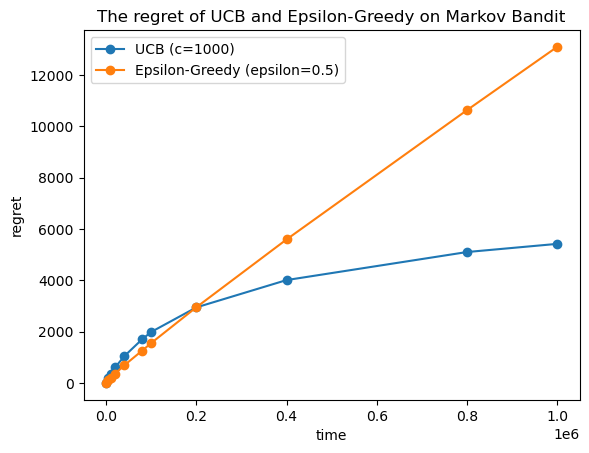

In [13]:
plt.plot(time, regret, marker='o', label='UCB (c=1000)')
plt.legend()
plt.xlabel("time")
plt.ylabel("regret")
plt.title("The regret of UCB and Epsilon-Greedy on Markov Bandit")


plt.plot(time, epsilon_regret, marker='o', label='Epsilon-Greedy (epsilon=0.5)')
plt.legend()

plt.show()

According to the graph above, we can see that the UCB algorithm can achieve logarithmic regret growth in this Markovian settings while the $\epsilon$-greedy algorithm only achieves linear regret growth.

Further, we compare it performance with Epsilon-Greedy Algorithm. Set $\epsilon=0.1$ and $c = 0.05$ for two algorithms respectively. The total time is $10000$. 

In [183]:
epsilons = np.linspace(0, 1, 100)
total_rs = np.zeros(100)
total_r = 0
for i in range(200):
    total_r += markov_epsilon_greedy(candidates, 0.1, 10000) 
print(f"The average total reward of 200 trails of epsilon-greedy algorithm is {total_r/200}")

total_r = 0
for i in range(200):
    total_r += markov_ucb(candidates, 10000, 0.05)
print(f"The average total reward of 200 trails of UCB algorithm is {total_r/200}")



The average total reward of 200 trails of epsilon-greedy algorithm is 15835.253499997987
The average total reward of 200 trails of UCB algorithm is 16182.277499997715


The UCB algorithm outperforms Greedy-Epsilon Algorithm in the Markovian settings.

**Possible Applications of Multi-Armed Bandit with Markovian Rewards**
- Dynamic Pricing in E-commerce:

    Markovian Customer Behavior: Each customer's behavior, preferences, or purchasing decisions may follow a Markovian process. An online retailer can dynamically adjust pricing strategies for different products based on the evolving states of customer behavior.

In the context of E-commerce, let's reevaluate the previous example. Consider a specific product offered by an online platform, which features 5 distinct pricing strategies analogous to bandit arms. Customers exhibit two states: *interested* (denoted as 0) and *not interested* (denoted as 1). Customer preferences for products adhere to a Markovian process, signifying transitions between states such as 'interested' and 'not interested.' For example, a customer may have states such as "interested," and "not interested," and transitions between these states are Markovian

The reward associated with each pricing option represents the profit generated from successfully selling the product. This profit is contingent on both the selected pricing strategy and the customer's current state. In more explicit terms, $r_x^i$ signifies the expected profit for pricing option $i$ when customers are in state $x$.

Our objective is to strategically choose the most effective pricing strategy (bandit arm) to maximize overall profit. And we can use UCB algorithm to find the best strategy. 


#### Case II: Gradient Bandit
Here comes the new setting for the three arms in dependent cases: ***When we choose to pull the $i$ th arm, the reward for this arm will multiply by a factor $\alpha_i$ which is known to us. We assume that $\alpha_i$ is equal to 0.9. Meanwhile, the other two arms' rewards will change simultaneously, one of the two other arms will multiply by a factor $\beta_i$ which is equal to 1.1. The $\beta_i$ is also known to us.*** And the upperbound and lowerbound for each arm's oracle value is 0.8 and 0.3 in order that the probability for each arm wouldn't be too extreme. Thus the oracle value for each arm will always in the range of [0.3, 0.8]. 



Below we use a new algorithm called Gradient Bandit to solve this problem. 

We consider learning a numerical preference for each action, denoted as $H_t(a) \in R$ . The larger the value of preference, the easier it is for the corresponding action to be selected, but preference cannot be explained by the reward it receives. Only the relative preference of one action to another is important: adding some number to the preference of all actions does not change the probability of each action being selected. This property is determined by the soft-max distribution.

The Gradient bandit algorithm works by maintaining a preference for each arm, which is updated based on the received reward and the
average reward.The probability of choosing an arm is proportional to the exponential of its preference. This means that
arms with higher preferences are more likely to be chosen, but there is always a chance to explore other arms.

In dependent cases, we update the preference of each arm.This ensures that the preferences reflect the dependent nature of the rewards.



In [186]:
from grad_bandit import alpha
from grad_bandit import beta
from grad_bandit import lowerbound
from grad_bandit import upperbound
real_theta = np.array([0.7,0.5,0.4])

def gradient_bandit(n, gamma):
    # Initialize the parameters
    H = np.zeros(3)  # Preference for each action
    pi = np.full(3, 1/3)  # Probability of each action
    R_avg = 0  # Average reward
    total_reward = 0


    # Implement the gradient bandit algorithm
    for t in range(1, n + 1):
        # Choose action according to pi
        arm = np.random.choice([0, 1, 2], p=pi)

        # Get reward
        reward = np.random.binomial(1, real_theta[arm])
        if(real_theta[arm] * alpha[arm] >=lowerbound[arm]):
             real_theta[arm] = real_theta[arm] * alpha[arm]

        #update the reward of other arm
        other_arm = np.random.choice(np.delete(np.array([0, 1, 2]), arm)) # randomly choose an arm from 1,2,3 except the chosen arm
        if (real_theta[other_arm] * beta[other_arm] <= upperbound[other_arm]):
            real_theta[other_arm] = real_theta[other_arm] * beta[other_arm]

        # Ensure reward is within bounds
        reward = max(min(reward, upperbound[arm]), lowerbound[arm])
        total_reward += reward
        # Update average reward
        R_avg = R_avg + (1/t) * (reward - R_avg)
        # Update preference
        for a in range(3):
            if a == arm:
                H[a] = H[a] + gamma * (reward - R_avg) * (1 - pi[a])
            else:
                H[a] = H[a] - gamma * (reward - R_avg) * pi[a]
        # Update action probabilities
        pi = np.exp(H) / np.sum(np.exp(H)) # softmax function

    return total_reward

New epsilon greedy and UCB algorithm for dependent cases as a comparison:

The parameter of epsilon-greedy algorithm $\epsilon$ is set to 0.1. The parameter of UCB algorithm $c$ is set to 1.(Since in Problem 1.4, we have found these two parameters leads to smaller regrets for the two algorithms)


In [ ]:
def new_epsilon_greedy(n, epsilon, real_theta):
    # Initialize the parameters
    total_reward = 0
    theta_hat = np.zeros(3)  # posterior probability of each arm
    count = np.zeros(3)


    # Implement the epsilon-greedy algorithm
    for t in range(1, n + 1):
        # exploitation
        if np.random.uniform() > epsilon:
            arm = np.argmax(theta_hat)
        # exploration
        else:
            # randomly choose an arm from 1,2,3
            arm = np.random.randint(3)
        count[arm] += 1
        # Update theta_hat
        # update the reward of the chosen arm, and the theta_hat should not exceed the upperbound and lowerbound

        reward = np.random.binomial(1, real_theta[arm])
        total_reward += reward
        theta_hat[arm] += (1 / count[arm]) * (reward - theta_hat[arm])
        if(real_theta[arm] * alpha[arm] >=lowerbound[arm]):
            real_theta[arm] = real_theta[arm] * alpha[arm]
        #update the reward of other arm
        other_arm = np.random.choice(np.delete(np.array([0, 1, 2]), arm)) # randomly choose an arm from 1,2,3 except the chosen arm
        if (real_theta[other_arm] * beta[other_arm] <= upperbound[other_arm]):
            real_theta[other_arm] = real_theta[other_arm] * beta[other_arm]
    return total_reward

def new_UCB(c, N, real_theta):
    theta_hat = np.array([0., 0., 0.])
    count = np.array([1, 1, 1])
    total_reward = 0

    for i in range(3):
        theta_hat[i] = np.random.binomial(1, real_theta[i])

    for t in range(4, N+1):
        I_t = np.argmax(theta_hat + c * np.sqrt(2*np.log(t) / count))
        count[I_t] += 1

        r_t = np.random.binomial(1, real_theta[I_t])
        theta_hat[I_t] += 1/count[I_t] * (r_t - theta_hat[I_t])
        total_reward += r_t
        if(real_theta[I_t] * alpha[I_t] >=lowerbound[I_t]):
                real_theta[I_t] = real_theta[I_t] * alpha[I_t]

        other_arm = np.random.choice(np.delete(np.array([0, 1, 2]), I_t))
        if (real_theta[other_arm] * beta[other_arm] <= upperbound[other_arm]):
            real_theta[other_arm] = real_theta[other_arm] * beta[other_arm]
        # theta_hat[other_arm] += 1/count[other_arm] * (r_other - theta_hat[other_arm])

    return total_reward, theta_hat

Simulation:

In [188]:

# average total reward of 200 trails of new epsilon-greedy algorithm
total_reward = np.zeros(200)
epsilon = 0.1
real_theta = np.array([0.7,0.5,0.4])
for i in range(200):
    total_reward[i] = new_epsilon_greedy(N, epsilon, real_theta)

average_total_reward = np.mean(total_reward)
print("The average total reward of 200 trails of new epsilon-greedy algorithm is", average_total_reward)

# average total reward of 200 trails of new UCB algorithm
c = 1
total_reward = np.zeros(200)
real_theta = np.array([0.7,0.5,0.4])
for i in range(200):
    total_reward[i], _ = new_UCB(c, N, real_theta)

average_total_reward = np.mean(total_reward)
print("The average total reward of 200 trails of new UCB algorithm is", average_total_reward)

# average total reward of 200 trails of gradient bandit algorithm
gamma = 0.25
total_reward = np.zeros(200)
real_theta = np.array([0.7,0.5,0.4])
for i in range(200):
    total_reward[i] = gradient_bandit(N, gamma)

average_total_reward = np.mean(total_reward)
print("The average total reward of 200 trails of gradient bandit algorithm is", average_total_reward)

The average total reward of 200 trails of new epsilon-greedy algorithm is 1993.355
The average total reward of 200 trails of new UCB algorithm is 2251.565
The average total reward of 200 trails of gradient bandit algorithm is 2678.250000000091


***The gradient bandit algorithm has the highest reward.*** 

**Possible Applications of Gradient Bandit**

- Online Advertising:

 In online advertising, advertisers often face the challenge of selecting the best combination of ads to display to users. Each ad can be considered as an arm, and the reward can represent the click-through rate or conversion rate. By using the gradient bandit algorithm, advertisers can learn the preferences of each ad and display the ad with the highest preference to users, thereby maximizing the click-through rate or conversion rate.

## Part II: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

### Problem 2.1

#### Problem Description
1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
	This policy behaves very good in most cases.
	Please design simulations to check the behavior of this policy.

#### Solution

In [ ]:
import torch 

# the initial parameter
param = torch.Tensor([[1, 1],
                      [1, 1]])

# the true probability of succeeding of 3 bandit
true_prob = torch.Tensor([0.6, 0.4])

def Sample(param):
    N = 5000
    T = 10
    results = 0
    base = 0.99

    for t in range(T):
      	# reset the parameters
        eval_param = param
        y = base
        for i in range(N):
            # Which bandit has the highest expactation of succeeding
            Expect = [x / (x + y) for (x, y) in eval_param]
            index = torch.argmax(torch.Tensor(Expect))
            # test the chosen bandit
            test = (torch.distributions.Uniform(0, 1).sample() <= true_prob[index])
            # update the parameters
            eval_param[index] = eval_param[index] + torch.Tensor([test, 1 ^ test])
            # update the total results
            results += test * y
            y *= base

    return (results / T).item()

print(Sample(param))

### Problem 2.2

#### Problem Description
2. However, such intuitive policy is unfortunately not optimal.
	Please provide an example to show why such policy is not optimal.

If the first bandit has a $90\%$ chance of succeeding and the second bandit has a $10\%$ chance of succeeding. But $(\alpha_1,\beta_1)=(10, 90)$,  $(\alpha_2,\beta_2)=(90, 10)$ and $\gamma=0.8$. In this setting, we have to choose the first bandit, which has a lower probability of succeeding, until $\frac{\alpha_2}{\alpha_2+\beta_2}\leq\frac{\alpha_1}{\alpha_1+\beta_1}$. And in best case, we have $800$ failure  in a row. Then, $\frac{\alpha_2}{\alpha_2+\beta_2}=\frac{\alpha_1}{\alpha_1+\beta_1}=\frac{1}{9}$ Now we can choose the bandit $2$, which has the bigger probability of succeeding. However, the reward is reduced to $\gamma^{800}\rightarrow0$, which can be omitted. Thus, this policy lead a very bad performance.

#### Solution


### Problem 2.3

#### Problem Description
3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1})
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2})
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2})
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}
	\end{equation*}

#### Solution

$R_i(\alpha_i, \beta_i)$ means how many points we will get in the whole process if we choose bandit $i$ in the time slot $1$. $R(\alpha_1,\beta_1,\alpha_2,\beta_2)$ means how many points we will get in total if we start at time slot $1$ with this setting.

We now consider the option in time slot $1$. Suppose that we choose the bandit $1$. We have $\frac{\alpha_1}{\alpha_1+\beta_1}$ chance of succeeding and $\frac{\alpha_1}{\alpha_1+\beta_1}$ chance of failling.

- If we succeed, we get $1$ point as reward immediately because we now in time slot $1$. After this trial, $\alpha_1^{\prime}=\alpha_1+1$ because we succeeded in time slot $1$. And in all latter time slots $t$, $t\geq2$, we will get $\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ in total. We should multiply a time decay $\gamma$ here because next time we will start at slot $2$, and $R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ means the reward starting at time slot $1$. So, the total reward we will get is $1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$.
- If we failed in time slot $1$, we won't win any points in time slot $1$. But we can get $\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ in all of latter trials. So, the total reward we will get is $\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$.

So, $R_1(\alpha_1,\beta_1)=\frac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\frac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$. Similarly, $R_2(\alpha_2,\beta_2)=\frac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\frac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_1,\beta_1,\alpha_2,\beta_2+1)]$. Obviosuely, we only have two choise in time slot $1$. So, $R(\alpha_1,\beta_1,\alpha_2,\beta_2)=max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$

### Problem 2.4

#### Problem Description
4. For the above equations, how to solve it exactly or approximately?

This problem can be solved by using dynamic programming. We can use a memo table to record the value of $R$ for each stateto avoid repeated calculation. And we can use a recursive function to calculate the value of $R(\alpha_1,\beta_1,\alpha_2,\beta_2)$ according to the equations in Problem 2.3. The code is shown below:


In [27]:
import numpy as np

def expected_reward(alpha1, beta1, alpha2, beta2, gamma, V, memo, max_iter, policy):
    if memo[alpha1][beta1][alpha2][beta2] != -1:
        return memo[alpha1][beta1][alpha2][beta2]

    # Base case: if we have reached the last iteration, no future rewards can be gained
    if alpha1 + beta1 >= max_iter or alpha2 + beta2 >= max_iter:
        return 0

    # Calculate the expected reward for choosing each bandit through recursion
    R1 = (alpha1 / (alpha1 + beta1) * (1 + gamma * expected_reward(alpha1 + 1, beta1, alpha2, beta2, gamma, V, memo,max_iter, policy)) +
          beta1 / (alpha1 + beta1) * (gamma * expected_reward(alpha1, beta1 + 1, alpha2, beta2, gamma, V, memo,max_iter, policy)))
    R2 = (alpha2 / (alpha2 + beta2) * (1 + gamma * expected_reward(alpha1, beta1, alpha2 + 1, beta2, gamma, V, memo,max_iter, policy)) +
          beta2 / (alpha2 + beta2) * (gamma * expected_reward(alpha1, beta1, alpha2, beta2 + 1, gamma, V, memo,max_iter, policy)))

    # Choose the action with the higher expected reward
    if R1 > R2:
        policy[alpha1][beta1][alpha2][beta2] = 1
        memo[alpha1][beta1][alpha2][beta2] = R1
    else:
        policy[alpha1][beta1][alpha2][beta2] = 2
        memo[alpha1][beta1][alpha2][beta2] = R2

    return memo[alpha1][beta1][alpha2][beta2]

def solve(alpha1, beta1, alpha2, beta2, gamma, max_iter):
    V = np.zeros((max_iter, max_iter, max_iter, max_iter))
    memo = np.full((max_iter, max_iter, max_iter, max_iter), -1)
    policy = np.zeros((max_iter, max_iter, max_iter, max_iter), dtype=int)

    # Call the recursive function
    expected_reward(alpha1, beta1, alpha2, beta2, gamma, V, memo, max_iter, policy)

    return V, policy

#### Solution

### Problem 2.5

#### Problem Description
5. Find the optimal policy.

We implement a dynamic programming algorithm to find the optimal policy for a two-armed bandit problem. The algorithm calculates the expected rewards for each state and uses recursion to make decisions based on the current state. It then simulates the policy to calculate the average reward. The algorithm aims to maximize the expected reward by considering the discount factor and the true reward probabilities. The code is shown below:

In [41]:
def simulate(alpha1, beta1, alpha2, beta2, policy, trials, max_iter, theta):
    total_reward = 0
    for _ in range(trials):
        a1, b1, a2, b2 = alpha1, beta1, alpha2, beta2
        for t in range(max_iter):
            # Ensure the indices do not exceed max_iter - 1
            a1 = min(a1, max_iter - 1)
            b1 = min(b1, max_iter - 1)
            a2 = min(a2, max_iter - 1)
            b2 = min(b2, max_iter - 1)

            # Determine which arm to pull based on the policy
            action = policy[a1][b1][a2][b2]

            # Simulate pulling the arm and getting a reward based on the true probability
            reward = np.random.binomial(1, theta[action - 1])
            total_reward += reward * (gamma ** t)

            # Update the counts for successes and failures
            if action == 1:
                a1 += reward
                b1 += (1 - reward)
            else:
                a2 += reward
                b2 += (1 - reward)
    return total_reward / trials

# Parameters for the simulation
alpha1, beta1, alpha2, beta2 = 1, 1, 1, 1  # Initial beliefs about the success probabilities with no prior information
gamma = 0.9  # Discount factor
max_iter = 100  # Maximum number of iterations
theta = [0.5, 0.9]  # True reward probabilities for each arm
trials = 1000  # Number of trials to simulate

# Solve for the optimal policy using dynamic programming
V, policy = solve(alpha1, beta1, alpha2, beta2, gamma, max_iter)

# Simulate the policy to find the average reward
average_reward = simulate(alpha1, beta1, alpha2, beta2, policy, trials, max_iter, theta)
print(f"Average reward from simulation: {average_reward}")

Average reward from simulation: 8.77905680099462


#### Soluiton

## How to use ChatGPT

In this project, we used a customized chatbot by using ChatGPT's API. Using the API gives us more flexibility to customize the parameters for ChatGPT. You can see the customized ChatGPT in `chatbot.py`. Then, we introduce some techniques we used for prompt engineering. 

#### Parameter Settings
- Temperature: we can set the temperature of an model to control the randomness of the model. The higher the temperature is, the more creative the model is. For this project, we set temperature to $0.5$ for algorithm implementation part, and $1$ for dependent case design in problem 1.6 because we want the model to give us some creative ideas.

- Set up prompt: Before model start working, we asked it to act like a Github Copilot by giving him a `setup_prompt` in `prompt.py`. This improves the model's coding performance.

#### Prompt Techniques
- Use delimiters to clearly indicate distinct parts of the input: Delimiters can be anything like:  `\```\`, `"""`, `< >`. For example, if I want to plot graph for some variables, I can use delimiters to highlight the variables' names. Check out `pic_prompt` in `prompt.py` for more details. 

- "Few-shot" prompting: Give model examples. Initially, the model cannot write the implementation of the algorithms. So we wrote the Eplsilon-Greedy Algorithm ourselves, use it as an example for the model and then ask the model to write the remaining algorithms. Check out `algo_impl_prompt` in `prompt.py` for more details. 
 
 

## Reference:
[Online Algorithms for the Multi-Armed Bandit Problem with
Markovian Rewards](https://liu.engin.umich.edu/wp-content/uploads/sites/56/2018/04/allerton2010.pdf)

[ChatGPT Prompt Engineering for Developers](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/1/introduction)

